# 市盈率 (P/E Ratio) 因子分析

**因子类型**: 基本面 - 估值因子

**因子特征**:
- **类型**: 估值指标，价值投资核心因子
- **方向**: 做多低PE股票（高因子值，因子值 = -PE）
- **核心逻辑**: PE越低，估值越便宜，投资价值越高

**因子定义**:
```
PE = 股价 / 每股收益 (EPS)
因子值 = -PE  （负值是为了统一做多高因子值）
```

**因子逻辑**:
- PE越低 → 相对估值越便宜 → 投资价值越高
- PE越高 → 相对估值越贵 → 投资价值越低
- 排除亏损股（PE<0）和极端值（PE>1000）

**数据来源**:
使用 `daily_basic` 中的 `pe_ttm` 字段（市盈率TTM，Trailing Twelve Months）

**分析流程**:
1. 导入库和初始化
2. 配置回测参数
3. 执行因子计算与回测
4. 业绩分析（含IC分析）
5. 可视化分析
6. 总结与优化建议

## 步骤 1: 导入标准化因子库

In [1]:
# ========================================
# 步骤 1: 导入标准化因子库
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 添加项目根目录到路径
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

# 导入市盈率因子标准化函数
from factor_library.fundamental.pe_factor import run_pe_factor_backtest

print("✅ 市盈率 (P/E Ratio) 因子库导入成功")
print(f"项目根目录: {project_root}")

✅ 市盈率 (P/E Ratio) 因子库导入成功
项目根目录: /Users/nachuanchen/Documents/Undergrad_Resources/投资学/Factor_strategy_platform


## 步骤 2: 配置回测参数

**主要参数**:
- **start_date/end_date**: 回测时间范围
- **use_ttm**: 是否使用TTM市盈率（推荐True）
- **rebalance_freq**: 调仓频率（建议monthly，因为PE变化相对较慢）
- **transaction_cost**: 单边交易成本

**筛选规则**:
- PE > 0（排除亏损股）
- PE < 1000（排除极端值）
- PE不为空

In [2]:
# ========================================
# 步骤 2: 配置回测参数
# ========================================
config = {
    # 时间范围
    'start_date': '2024-01-01',
    'end_date': '2025-09-30',
    
    # 因子参数
    'use_ttm': True,                 # 使用PE-TTM（推荐）
    
    # 回测参数
    'rebalance_freq': 'monthly',     # 调仓频率（月度）
    'transaction_cost': 0.0003,      # 0.03% 交易费用
}

print("=" * 60)
print("回测配置 - 市盈率因子")
print("=" * 60)
for key, value in config.items():
    print(f"  {key}: {value}")
print("=" * 60)

回测配置 - 市盈率因子
  start_date: 2024-01-01
  end_date: 2025-09-30
  use_ttm: True
  rebalance_freq: monthly
  transaction_cost: 0.0003


## 步骤 3: 执行因子计算与回测

使用标准化函数 `run_pe_factor_backtest()` 一键完成：

**执行流程**:
1. 加载全市场股票
2. 加载 daily_basic 数据（含PE-TTM）
3. 筛选有效PE值（0 < PE < 1000）
4. 计算因子值（-PE）
5. 执行Long-Only回测（做多低PE股票）
6. 计算IC和业绩指标

**注意**: 此过程可能需要1-2分钟

In [3]:
# ========================================
# 步骤 3: 执行因子计算与回测
# ========================================
print("开始执行因子计算与回测...")
print("=" * 60)

results = run_pe_factor_backtest(**config)

print("\n" + "=" * 60)
print("✅ 回测执行完成！")
print("=" * 60)

开始执行因子计算与回测...
市盈率 (P/E Ratio) 因子回测

回测配置:
  时间范围: 2024-01-01 ~ 2025-09-30
  使用TTM: True
  调仓频率: monthly
  交易成本: 0.0003

市盈率 (P/E Ratio) 因子计算
未指定股票池，使用全市场股票...
 清洗后数据加载成功！
  数据类型: daily
  数据量: 10,216,839 条记录，13 列
  过滤后: 1,982,979 条记录 (过滤了 8,233,860 条)
✅ 股票池: 4806 只股票

使用 daily_basic 中的 PE-TTM 数据...
 清洗后数据加载成功！
  数据类型: daily_basic
  数据量: 12,424,696 条记录，18 列
  过滤后: 2,033,842 条记录 (过滤了 10,390,854 条)
✅ 成功加载数据
   数据时间范围: 2024-01-02 00:00:00 ~ 2025-09-30 00:00:00
   数据量: 2,033,842 条记录

步骤: 筛选有效PE值...
  原始数据: 2,033,842 条
  过滤后: 1,970,398 条 (保留 96.9%)
  过滤掉: 63,444 条
    - PE为空: 11,216 条
    - PE<=0 (亏损股): 0 条
    - PE>=1000 (极端值): 52,228 条

步骤: 计算因子值...

PE-TTM 统计信息:
  均值: 89.26
  中位数: 39.75
  标准差: 133.03
  最小值: 0.99
  25%分位: 21.27
  75%分位: 92.89
  最大值: 999.98

✅ 市盈率因子计算完成！
   有效记录数: 1,970,398
   覆盖股票数: 4738
   覆盖交易日数: 425

 清洗后数据加载成功（重复调用，已省略详细信息）
  过滤后: 1,954,629 条记录 (过滤了 8,262,210 条)

回测结果

📊 业绩指标:
  总收益率: 38.34%
  年化收益率: 21.27%
  年化波动率: 31.07%
  夏普比率: 0.68
  最大回撤: -28.97%

📊 IC分析:
  IC均值: 

## 步骤 4: 业绩分析

### 4.1 业绩指标

In [4]:
# ========================================
# 步骤 4: 分析业绩表现
# ========================================

if results['portfolio_returns'] is None:
    print("⚠️  因子数据为空，无法进行回测分析")
else:
    metrics = results['performance_metrics']
    
    print("=" * 60)
    print("市盈率因子策略业绩总结 (Long_Only - 做多低PE)")
    print("=" * 60)
    
    print(f"\n📊 业绩指标:")
    print(f"  总收益率:     {metrics['total_return']:.2%}")
    print(f"  年化收益率:   {metrics['annualized_return']:.2%}")
    print(f"  年化波动率:   {metrics['volatility']:.2%}")
    print(f"  夏普比率:     {metrics['sharpe_ratio']:.3f}")
    print(f"  最大回撤:     {metrics['max_drawdown']:.2%}")
    
    # IC 分析
    analysis = results['analysis_results']
    if analysis.get('ic_series') is not None:
        print(f"\n📊 IC分析（Spearman相关性）:")
        print(f"  IC均值:       {analysis['ic_mean']:.4f}")
        print(f"  IC标准差:     {analysis['ic_std']:.4f}")
        print(f"  ICIR:         {analysis['icir']:.4f}")
        print(f"  IC>0占比:     {analysis['ic_positive_ratio']:.2%}")
        
        # IC评价
        if abs(analysis['ic_mean']) > 0.03:
            print(f"  ✅ 因子有效 (|IC| > 0.03)")
        else:
            print(f"  ⚠️ 因子预测能力较弱 (|IC| < 0.03)")
            
        if analysis['icir'] > 1.0:
            print(f"  ✅ ICIR优秀 (> 1.0)")
        elif analysis['icir'] > 0.5:
            print(f"  ✅ ICIR良好 (> 0.5)")
        else:
            print(f"  ⚠️ ICIR较低 (< 0.5)")
    
    # 因子覆盖统计
    factor_data = results['factor_data']
    print(f"\n📈 因子覆盖:")
    print(f"  有效因子记录数: {len(factor_data):,}")
    print(f"  覆盖股票数:     {factor_data.index.get_level_values('ts_code').nunique()}")
    print(f"  覆盖交易日数:   {factor_data.index.get_level_values('trade_date').nunique()}")
    
    print("\n" + "=" * 60)

市盈率因子策略业绩总结 (Long_Only - 做多低PE)

📊 业绩指标:
  总收益率:     38.34%
  年化收益率:   21.27%
  年化波动率:   31.07%
  夏普比率:     0.685
  最大回撤:     -28.97%

📊 IC分析（Spearman相关性）:
  IC均值:       0.0180
  IC标准差:     0.1805
  ICIR:         0.0998
  IC>0占比:     54.25%
  ⚠️ 因子预测能力较弱 (|IC| < 0.03)
  ⚠️ ICIR较低 (< 0.5)

📈 因子覆盖:
  有效因子记录数: 1,970,398
  覆盖股票数:     4738
  覆盖交易日数:   425



### 4.2 因子分布分析

In [5]:
# 因子分布统计
if results['factor_data'] is not None:
    factor_values = results['factor_data']['factor'].values
    pe_values = -factor_values  # 转换回PE值
    
    print("PE-TTM 分布统计:")
    print("=" * 60)
    stats = pd.Series(pe_values).describe()
    for idx, val in stats.items():
        print(f"  {idx}: {val:.2f}")
    
    # 分位数分布
    print("\nPE分位数分布:")
    quantiles = [0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
    for q in quantiles:
        val = np.quantile(pe_values, q)
        print(f"  {q*100:.0f}%: {val:.2f}")

PE-TTM 分布统计:
  count: 1970398.00
  mean: 89.26
  std: 133.03
  min: 0.99
  25%: 21.27
  50%: 39.75
  75%: 92.89
  max: 999.98

PE分位数分布:
  10%: 13.73
  25%: 21.27
  50%: 39.75
  75%: 92.89
  90%: 220.56
  95%: 348.79
  99%: 729.87


## 步骤 5: 可视化分析

/var/folders/3v/qp1m5cd16l5dgvqp5zlpv9rh0000gn/T/ipykernel_99216/3693103218.py:109: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial Unicode MS.
  plt.tight_layout()
/var/folders/3v/qp1m5cd16l5dgvqp5zlpv9rh0000gn/T/ipykernel_99216/3693103218.py:109: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial Unicode MS.
  plt.tight_layout()
/var/folders/3v/qp1m5cd16l5dgvqp5zlpv9rh0000gn/T/ipykernel_99216/3693103218.py:109: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Arial Unicode MS.
  plt.tight_layout()
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **k

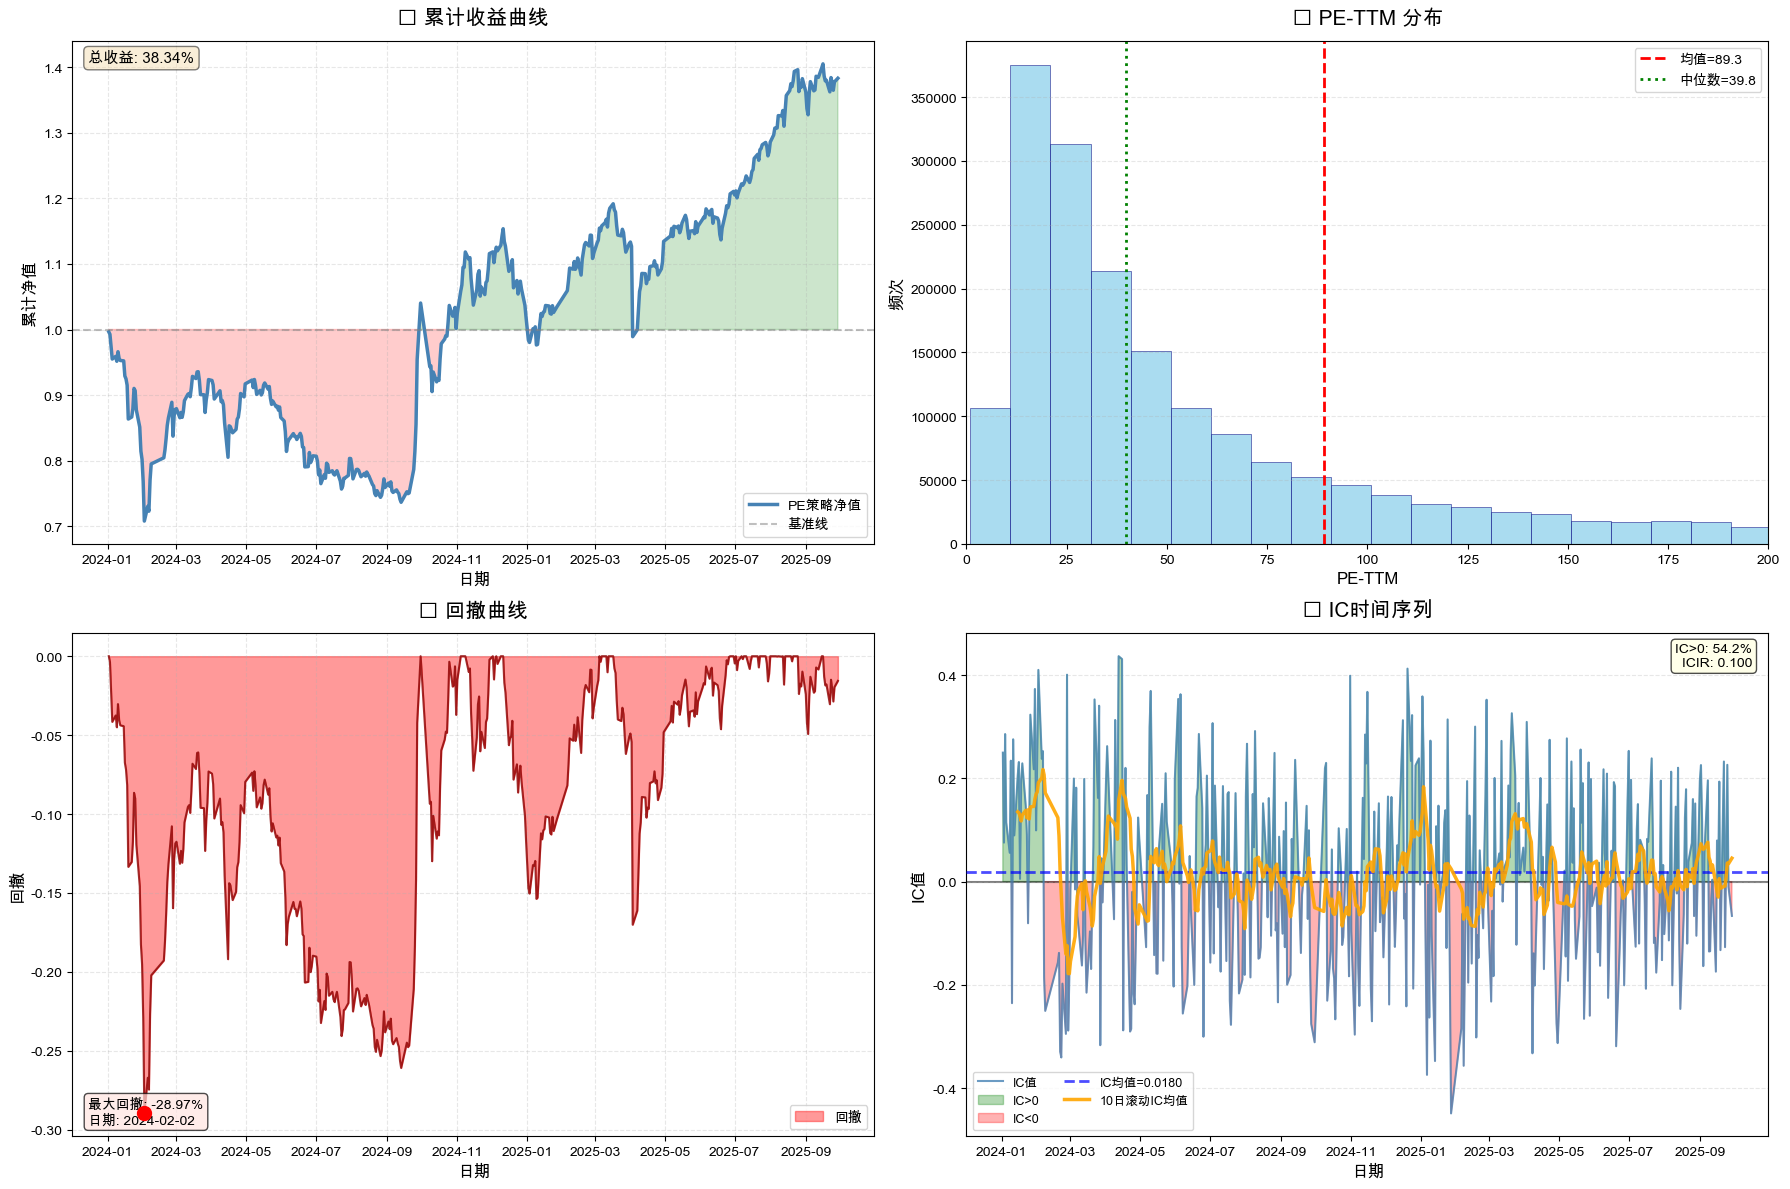


✅ 可视化完成！


In [7]:
# ========================================
# 步骤 5: 可视化分析
# ========================================

if results['portfolio_returns'] is not None:
    portfolio_returns = results['portfolio_returns']
    analysis = results['analysis_results']
    
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. 累计收益曲线
    cum_ret = (1 + portfolio_returns).cumprod()
    axes[0, 0].plot(cum_ret.index, cum_ret.values, linewidth=2.5, color='steelblue', label='PE策略净值')
    axes[0, 0].axhline(y=1, color='gray', linestyle='--', linewidth=1.5, alpha=0.5, label='基准线')
    axes[0, 0].fill_between(cum_ret.index, 1, cum_ret.values, 
                            where=(cum_ret.values >= 1), alpha=0.2, color='green', interpolate=True)
    axes[0, 0].fill_between(cum_ret.index, 1, cum_ret.values, 
                            where=(cum_ret.values < 1), alpha=0.2, color='red', interpolate=True)
    axes[0, 0].set_title('📈 累计收益曲线', fontsize=15, fontweight='bold', pad=12)
    axes[0, 0].set_ylabel('累计净值', fontsize=12)
    axes[0, 0].set_xlabel('日期', fontsize=12)
    axes[0, 0].grid(True, alpha=0.3, linestyle='--')
    axes[0, 0].legend(loc='best', fontsize=10)
    
    # 添加收益率标注
    final_return = (cum_ret.iloc[-1] - 1) * 100
    axes[0, 0].text(0.02, 0.98, f'总收益: {final_return:.2f}%', 
                    transform=axes[0, 0].transAxes, fontsize=11, 
                    verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # 2. PE分布
    factor_data = results['factor_data']
    pe_values = -factor_data['factor'].values
    axes[0, 1].hist(pe_values, bins=100, alpha=0.7, color='skyblue', edgecolor='navy', linewidth=0.5)
    axes[0, 1].axvline(x=pe_values.mean(), color='red', linestyle='--', linewidth=2, 
                       label=f'均值={pe_values.mean():.1f}')
    axes[0, 1].axvline(x=np.median(pe_values), color='green', linestyle=':', linewidth=2, 
                       label=f'中位数={np.median(pe_values):.1f}')
    axes[0, 1].set_title('📊 PE-TTM 分布', fontsize=15, fontweight='bold', pad=12)
    axes[0, 1].set_xlabel('PE-TTM', fontsize=12)
    axes[0, 1].set_ylabel('频次', fontsize=12)
    axes[0, 1].grid(True, alpha=0.3, linestyle='--', axis='y')
    axes[0, 1].legend(loc='best', fontsize=10)
    axes[0, 1].set_xlim(0, 200)  # 限制显示范围便于观察
    
    # 3. 回撤曲线
    running_max = cum_ret.cummax()
    drawdown = (cum_ret - running_max) / running_max
    axes[1, 0].fill_between(drawdown.index, 0, drawdown.values, color='red', alpha=0.4, label='回撤')
    axes[1, 0].plot(drawdown.index, drawdown.values, color='darkred', linewidth=1.5, alpha=0.8)
    axes[1, 0].set_title('📉 回撤曲线', fontsize=15, fontweight='bold', pad=12)
    axes[1, 0].set_ylabel('回撤', fontsize=12)
    axes[1, 0].set_xlabel('日期', fontsize=12)
    axes[1, 0].grid(True, alpha=0.3, linestyle='--')
    axes[1, 0].legend(loc='best', fontsize=10)
    
    # 标注最大回撤
    max_dd = drawdown.min()
    max_dd_date = drawdown.idxmin()
    axes[1, 0].scatter([max_dd_date], [max_dd], color='red', s=100, zorder=5)
    axes[1, 0].text(0.02, 0.02, f'最大回撤: {max_dd*100:.2f}%\n日期: {max_dd_date.strftime("%Y-%m-%d")}', 
                    transform=axes[1, 0].transAxes, fontsize=10, 
                    verticalalignment='bottom',
                    bbox=dict(boxstyle='round', facecolor='mistyrose', alpha=0.7))
    
    # 4. IC时间序列（折线图）
    if analysis.get('ic_series') is not None:
        ic_series = analysis['ic_series']
        
        # 绘制IC折线图，根据正负填充不同颜色
        axes[1, 1].plot(ic_series.index, ic_series.values, color='steelblue', 
                        linewidth=1.5, alpha=0.8, label='IC值', zorder=2)
        
        # 填充正负区域
        axes[1, 1].fill_between(ic_series.index, 0, ic_series.values, 
                                where=(ic_series.values >= 0), alpha=0.3, color='green', 
                                interpolate=True, label='IC>0')
        axes[1, 1].fill_between(ic_series.index, 0, ic_series.values, 
                                where=(ic_series.values < 0), alpha=0.3, color='red', 
                                interpolate=True, label='IC<0')
        
        # 添加0线和均值线
        axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=1.5, alpha=0.5, zorder=1)
        axes[1, 1].axhline(y=ic_series.mean(), color='blue', linestyle='--', linewidth=2, 
                           alpha=0.7, label=f'IC均值={ic_series.mean():.4f}', zorder=3)
        
        # 添加10日滚动均值
        rolling_ic = ic_series.rolling(window=10).mean()
        axes[1, 1].plot(rolling_ic.index, rolling_ic.values, color='orange', linewidth=2.5, 
                        alpha=0.9, label='10日滚动IC均值', zorder=4)
        
        axes[1, 1].set_title('📊 IC时间序列', fontsize=15, fontweight='bold', pad=12)
        axes[1, 1].set_ylabel('IC值', fontsize=12)
        axes[1, 1].set_xlabel('日期', fontsize=12)
        axes[1, 1].grid(True, alpha=0.3, linestyle='--', axis='y')
        axes[1, 1].legend(loc='best', fontsize=9, ncol=2)
        
        # 添加统计信息
        ic_positive = (ic_series > 0).sum() / len(ic_series) * 100
        axes[1, 1].text(0.98, 0.98, f'IC>0: {ic_positive:.1f}%\nICIR: {analysis["icir"]:.3f}', 
                        transform=axes[1, 1].transAxes, fontsize=10, 
                        verticalalignment='top', horizontalalignment='right',
                        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))
    else:
        axes[1, 1].text(0.5, 0.5, '⚠️ IC数据不足', ha='center', va='center', fontsize=16, color='gray')
        axes[1, 1].set_title('📊 IC时间序列', fontsize=15, fontweight='bold', pad=12)
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\n✅ 可视化完成！")
else:
    print("⚠️  无法绘制图表：因子数据为空")


## 步骤 6: 总结与优化建议

### 市盈率因子特性

**优势**:
- ✅ **简单直观**: PE是最常用的估值指标，容易理解
- ✅ **数据可得性强**: 几乎所有股票都有PE数据
- ✅ **价值投资基础**: 低PE策略是价值投资的核心思想
- ✅ **长期有效性**: 历史数据显示低PE组合长期跑赢高PE组合

**局限性**:
- ⚠️ **周期性影响**: PE受盈利周期影响大
- ⚠️ **成长性忽略**: 不考虑公司成长性
- ⚠️ **行业差异**: 不同行业PE水平差异很大
- ⚠️ **亏损股无效**: PE为负的股票无法使用

---

### 优化方向

1. **行业中性化**:
   ```python
   # 在每个行业内部进行PE排名
   factor = factor.groupby(['trade_date', 'industry']).rank(pct=True)
   ```

2. **结合PEG指标**（PE/增长率）:
   ```python
   # PEG = PE / EPS增长率
   # PEG < 1 通常认为被低估
   ```

3. **动态PE阈值**:
   ```python
   # 根据市场整体PE水平动态调整阈值
   market_pe = pe_values.median()
   pe_threshold = market_pe * 1.5
   ```

4. **多因子组合**:
   - PE + PB（市净率）
   - PE + ROE（净资产收益率）
   - PE + 盈利增长

5. **市值分层**:
   ```python
   # 大盘股和小盘股PE特征不同，分别处理
   large_cap = data[data['total_mv'] > data['total_mv'].median()]
   ```

---

### 参数优化建议

1. **PE上下限**:
   - 当前: 0 < PE < 1000
   - 建议: 测试不同阈值（如 5-100, 10-80 等）

2. **调仓频率**:
   - 当前: monthly
   - 建议: 测试 quarterly（季度）或 semi-annual（半年度）
   - PE变化相对较慢，低频调仓可能更合适

3. **持仓集中度**:
   - 当前: 等权所有低PE股票
   - 建议: 只持有PE最低的前20-30%

---

### 进一步研究

1. **市场环境分析**:
   - 牛市 vs 熊市表现
   - 高波动 vs 低波动环境

2. **行业轮动**:
   - 不同行业PE有效性
   - 周期股 vs 成长股

3. **风险分析**:
   - 低PE组合的风险特征
   - 与其他因子的相关性

4. **择时策略**:
   - 市场整体PE水平作为择时指标
   - 结合宏观经济指标

---

### 相关文档

- 因子代码: `factor_library/fundamental/pe_factor.py`
- 数据加载: `data_manager/data.py`
- 其他估值因子: `pb_factor.py`, `ps_factor.py`

**Happy Value Investing! 📊💰**